In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.metrics import r2_score

In [2]:
df_car_name = pd.read_csv('Car name.csv')
df_car_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [3]:
df_car_name.head(5)

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino

In [4]:
df_car_attributes = pd.read_json('Car-Attributes.json')
df_car_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [5]:
df_car_attributes.head(5)

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

In [6]:
df = pd.concat([df_car_name, df_car_attributes],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Five Point summary
***************************
mpg:  Mean=23.5146 Median=23.0000 Max=46.6000 Min=9.0000 Lower Quartile=34.7500 Upper Quartile =46.2500
cyl:  Mean=5.4548 Median=4.0000 Max=8.0000 Min=3.0000 Lower Quartile=10.0000 Upper Quartile =14.0000
disp:  Mean=193.4259 Median=148.5000 Max=455.0000 Min=68.0000 Lower Quartile=340.8750 Upper Quartile =498.6250
wt: Mean=2970.4246 Median=2803.5000 Max=5140.0000 Min=1613.0000 Lower Quartile=4300.1250 Upper Quartile =5684.3750
acc: Mean=15.5681 Median=15.5000 Max=24.8000 Min=8.0000 Lower Quartile=18.8500 Upper Quartile =22.2000
yr:  Mean=76.0101 Median=76.0000 Max=82.0000 Min=70.0000 Lower Quartile=82.0000 Upper Quartile =88.0000


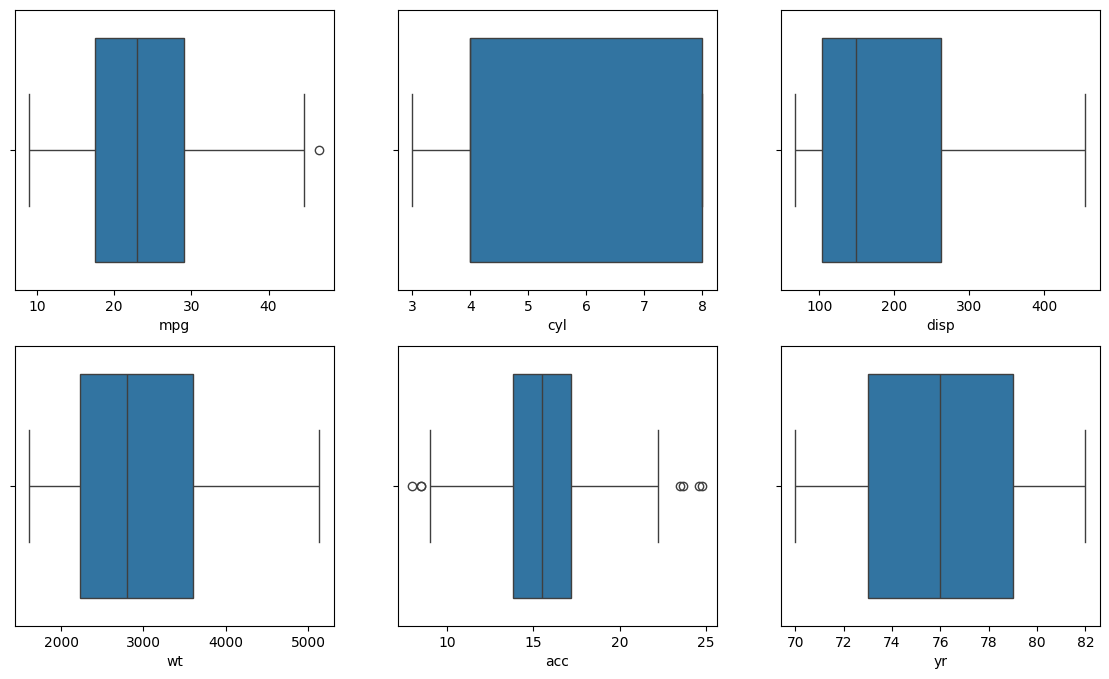

In [7]:
class FivePoint:
  def __init__(self, s):
      self.s= s
      self.mean_ = s.mean()
      self.median_ = s.median()
      self.max_ =s.max()
      self.min_ =s.min()
      self.iqr_ =s.quantile(0.75) - s.quantile(0.25)
      self.lower_q = s.quantile(0.25) + (1.5 * self.iqr_)
      self.upper_q = s.quantile(0.75) + (1.5 * self.iqr_)

mpg_five=FivePoint(df['mpg'])
cyl_five=FivePoint(df['cyl'])
disp_five=FivePoint(df['disp'])
wt_five=FivePoint(df['wt'])
acc_five=FivePoint(df['acc'])
yr_five=FivePoint(df['yr'])

print('\033[94mFive Point summary\n***************************')
print('mpg:  Mean={:2.4f} Median={:2.4f} Max={:2.4f} Min={:2.4f} Lower Quartile={:2.4f} Upper Quartile ={:2.4f}'.\
      format(mpg_five.mean_, mpg_five.median_, mpg_five.max_, mpg_five.min_, mpg_five.lower_q, mpg_five.upper_q))
print('cyl:  Mean={:2.4f} Median={:2.4f} Max={:2.4f} Min={:2.4f} Lower Quartile={:2.4f} Upper Quartile ={:2.4f}'.\
      format(cyl_five.mean_, cyl_five.median_, cyl_five.max_, cyl_five.min_, cyl_five.lower_q, cyl_five.upper_q))
print('disp:  Mean={:2.4f} Median={:2.4f} Max={:2.4f} Min={:2.4f} Lower Quartile={:2.4f} Upper Quartile ={:2.4f}'.\
      format(disp_five.mean_, disp_five.median_, disp_five.max_, disp_five.min_, disp_five.lower_q, disp_five.upper_q))
print('wt: Mean={:2.4f} Median={:2.4f} Max={:2.4f} Min={:2.4f} Lower Quartile={:2.4f} Upper Quartile ={:2.4f}'.\
      format(wt_five.mean_, wt_five.median_, wt_five.max_, wt_five.min_, wt_five.lower_q, wt_five.upper_q))
print('acc: Mean={:2.4f} Median={:2.4f} Max={:2.4f} Min={:2.4f} Lower Quartile={:2.4f} Upper Quartile ={:2.4f}'.\
      format(acc_five.mean_, acc_five.median_, acc_five.max_, acc_five.min_, acc_five.lower_q, acc_five.upper_q))
print('yr:  Mean={:2.4f} Median={:2.4f} Max={:2.4f} Min={:2.4f} Lower Quartile={:2.4f} Upper Quartile ={:2.4f}'.\
      format(yr_five.mean_, yr_five.median_, yr_five.max_, yr_five.min_, yr_five.lower_q, yr_five.upper_q))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# axes.ravel()
sns.boxplot(data=df, x='mpg', ax=axes[0,0])
sns.boxplot(data=df, x='cyl', ax=axes[0,1])
sns.boxplot(data=df, x='disp', ax=axes[0,2])
sns.boxplot(data=df, x='wt', ax=axes[1,0])
sns.boxplot(data=df, x='acc', ax=axes[1,1])
sns.boxplot(data=df, x='yr', ax=axes[1,2])
plt.show()

Five Point Observations
1. Scales of variables varies largely. Must be normalised before model.
2. 'mpg' contains an outlier but value seems to be ok. No treatmnet required.
3. 'acc' contains an outlier but value seems to be ok. No treatmnet required.
4. 'yr' though is counted as integer variable but it seems categorical in nature, will explore further.

Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach

In [8]:
for i in df.index:
    if df.loc[i, 'mpg'] == '' or df.loc[i, 'mpg'] == ' ' or df.loc[i, 'mpg'] is None or not ( type(df.loc[i, 'mpg'])==np.float64 or type(df.loc[i, 'mpg'])==np.int64 ):
        print('mpg null/not numeric for index = {} value= {}'.format(i, type(df.loc[i, 'mpg']))) 
    if df.loc[i, 'cyl'] == '' or df.loc[i, 'cyl'] == ' ' or df.loc[i, 'cyl'] is None or not ( type(df.loc[i, 'cyl'])==np.float64 or type(df.loc[i, 'cyl'])==np.int64 ):
        print('cyl null/not numeric for index = {}'.format(i, df.loc[i, 'cyl']))
    if df.loc[i, 'disp'] == '' or df.loc[i, 'disp'] == ' ' or df.loc[i, 'disp'] is None or not ( type(df.loc[i, 'disp'])==np.float64 or type(df.loc[i, 'disp'])==np.int64):
        print('disp null for index = {}'.format(i, df.loc[i, 'disp']))
    if df.loc[i, 'wt'] == '' or df.loc[i, 'wt'] == ' ' or df.loc[i, 'wt'] is None or not ( type(df.loc[i, 'wt'])==np.float64 or type(df.loc[i, 'wt'])==np.int64):
        print('wt null for index = {} value={}'.format(i, df.loc[i, 'wt']))
    if df.loc[i, 'acc'] == '' or df.loc[i, 'acc'] == ' ' or df.loc[i, 'acc'] is None or not ( type(df.loc[i, 'acc'])==np.float64 or type(df.loc[i, 'acc'])==np.int64):
        print('acc null for index = {} value={}'.format(i, df.loc[i, 'acc']))
    if df.loc[i, 'yr'] == '' or df.loc[i, 'yr'] == ' ' or df.loc[i, 'yr'] is None or not ( type(df.loc[i, 'yr'])==np.float64 or type(df.loc[i, 'yr'])==np.int64):
        print('yr null for index = {}'.format(i, df.loc[i, 'yr']))
    if df.loc[i, 'hp'] == '' or df.loc[i, 'hp'] == ' ' or df.loc[i, 'hp'] is None or not ( type(df.loc[i, 'hp'])==np.float64 or type(df.loc[i, 'hp'])==np.int64 or type(df.loc[i, 'hp'])==int):
        print('hp null for index = {} value={}'.format(i, df.loc[i, 'hp']))
    if df.loc[i, 'car_name'] == '' or df.loc[i, 'car_name'] == ' ' or df.loc[i, 'car_name'] is None or not ( type(df.loc[i, 'car_name'])==str):
        print('car_name null for index = {} value={}'.format(i, type(df.loc[i, 'car_name'])))

hp null for index = 32 value=?
hp null for index = 126 value=?
hp null for index = 330 value=?
hp null for index = 336 value=?
hp null for index = 354 value=?
hp null for index = 374 value=?


In [9]:
df['hp'].replace('?', np.nan, inplace=True)
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
a = df['hp']
imputer.fit(a.to_frame())

SimpleImputer()

In [11]:
imputed_data = imputer.transform(df['hp'].to_frame())
df['hp'] = imputed_data
df['hp']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: hp, Length: 398, dtype: float64

In [12]:
# Find duplicate rows
duplicate_rows = df.duplicated()

# Print the duplicate rows
d = duplicate_rows.to_frame()
d[ d.loc[:, 0] == True].sum()

0    0
dtype: int64

In [13]:
df['yr'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

Observation
------------
The value of yr feature represents year between 1970 to 1982. But as value 70 to 82 is misleading in weightage. 
Hence, would like to replace this column with age which will range with formulation 
age = 2024 - yr

In [14]:
df['Age'] = 2024 - (df['yr'] + 1900)
df['Age']

0      54
1      54
2      54
3      54
4      54
       ..
393    42
394    42
395    42
396    42
397    42
Name: Age, Length: 398, dtype: int64

In [15]:
df.drop(labels=['yr'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   origin    398 non-null    int64  
 8   Age       398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [16]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

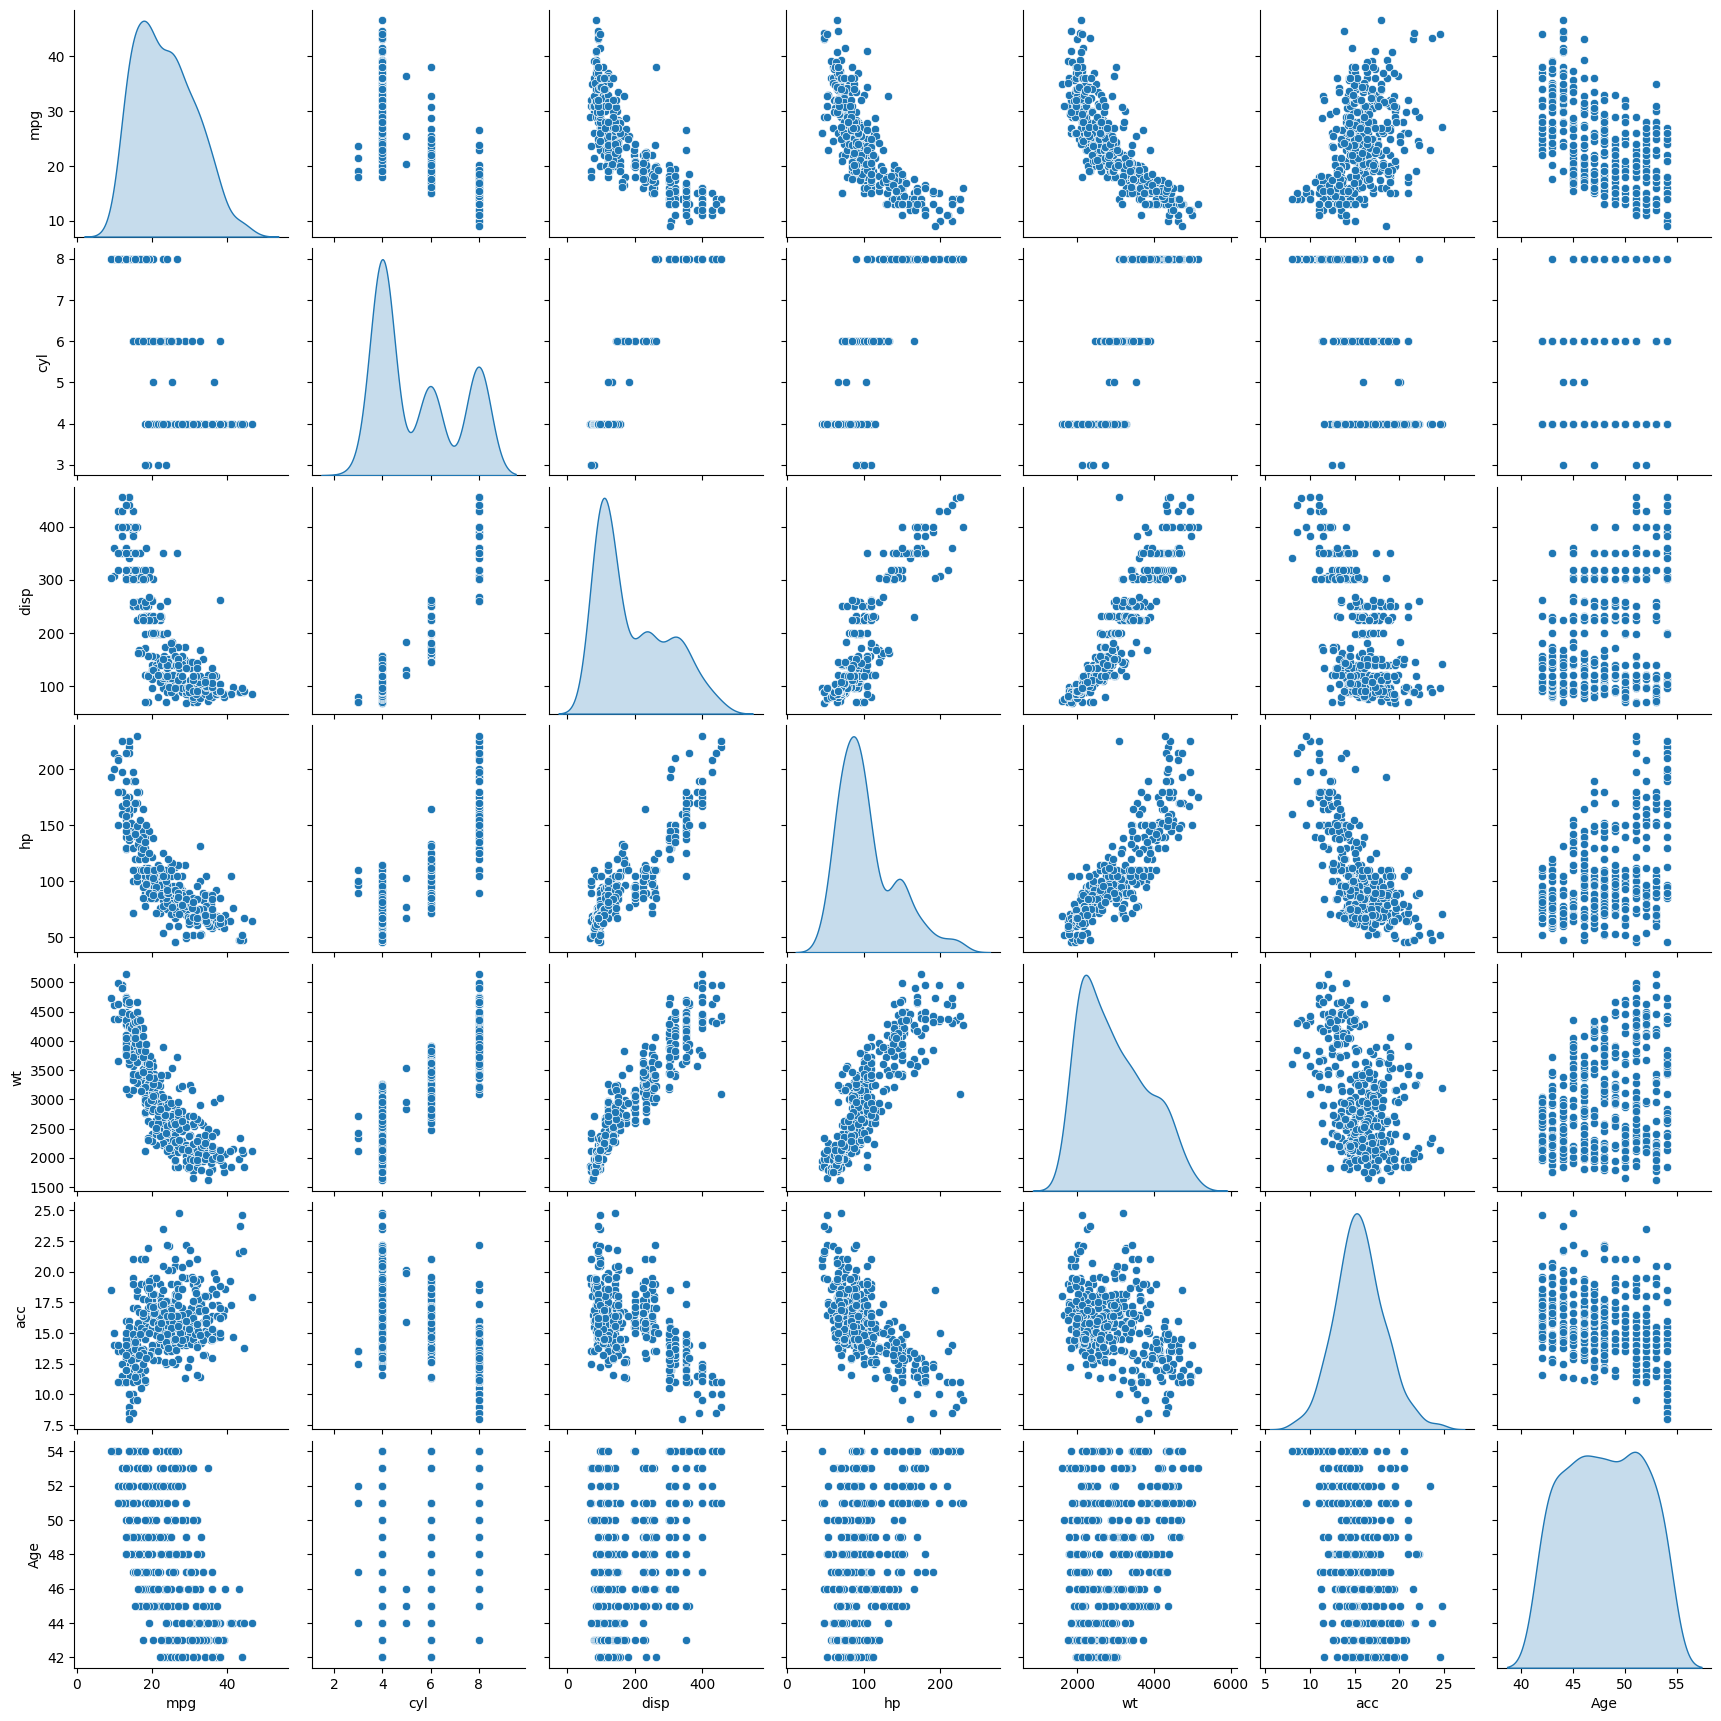

In [17]:
sns.pairplot(df.drop(labels=['car_name', 'origin'], axis=1), diag_kind='kde')
plt.show()

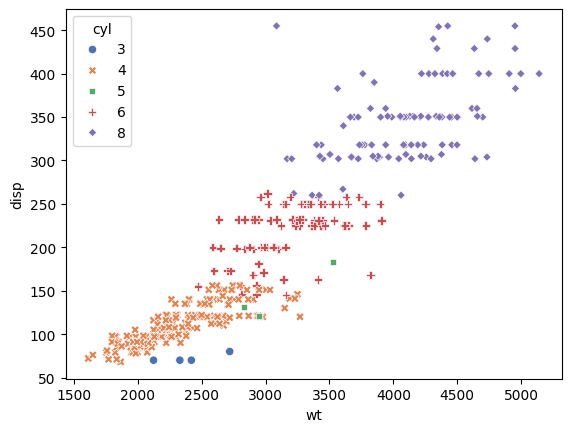

In [18]:
# Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.
sns.scatterplot(data=df, x='wt', y='disp', hue='cyl', style='cyl', palette='deep')
plt.show()

In [19]:
df.groupby(by='cyl').count()

car_name  mpg  disp   hp   wt  acc  origin  Age
cyl                                                 
3           4    4     4    4    4    4       4    4
4         204  204   204  204  204  204     204  204
5           3    3     3    3    3    3       3    3
6          84   84    84   84   84   84      84   84
8         103  103   103  103  103  103     103  103

#### Share insights for Q2.d.
1. wt and disp seems to be positively related
2. cyl hue clearly establish cluster pattrens with both wt and disp

In [20]:
# Check for unexpected values in all the features and datapoints with such values.
# This is already done above with null checking and five point summary. We dont need to treat any outlier
# Apply K-Means clustering for 2 to 10 clusters.

from sklearn.cluster import KMeans
from scipy.stats import zscore

#Scaling
dfAttr=df.iloc[:,1:]
dfScaled = dfAttr.apply(zscore) 
dfScaled.head(5)

mpg       cyl      disp        hp        wt       acc    origin  \
0 -0.706439  1.498191  1.090604  0.669196  0.630870 -1.295498 -0.715145   
1 -1.090751  1.498191  1.503514  1.586599  0.854333 -1.477038 -0.715145   
2 -0.706439  1.498191  1.196232  1.193426  0.550470 -1.658577 -0.715145   
3 -0.962647  1.498191  1.061796  1.193426  0.546923 -1.295498 -0.715145   
4 -0.834543  1.498191  1.042591  0.931311  0.565841 -1.840117 -0.715145   

        Age  
0  1.627426  
1  1.627426  
2  1.627426  
3  1.627426  
4  1.627426

In [21]:
print(dfScaled.shape[0])
df.isnull().sum()

398


car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
origin      0
Age         0
dtype: int64

In [22]:
# Please compare the output as version problem leads to error in code run
# also, for my purpose i have set the environment variable OMP_NUM_THREADS = 1
import sklearn
print(sklearn.show_versions())


System:
    python: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
executable: C:\ProgramData\anaconda3\python.exe
   machine: Windows-10-10.0.22635-SP0

Python dependencies:
      sklearn: 1.2.2
          pip: 23.2.1
   setuptools: 68.0.0
        numpy: 1.26.3
        scipy: 1.11.4
       Cython: None
       pandas: 2.1.4
   matplotlib: 3.8.2
       joblib: 1.2.0
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 1
         prefix: libopenblas
       filepath: C:\Users\Indranil\AppData\Roaming\Python\Python311\site-packages\numpy.libs\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: SkylakeX

       user_api: blas
   internal_api: mkl
    num_threads: 1
         prefix: mkl_rt
       filepath: C:\ProgramData\anaconda3\Library\bin\mkl_rt.2.dll
        

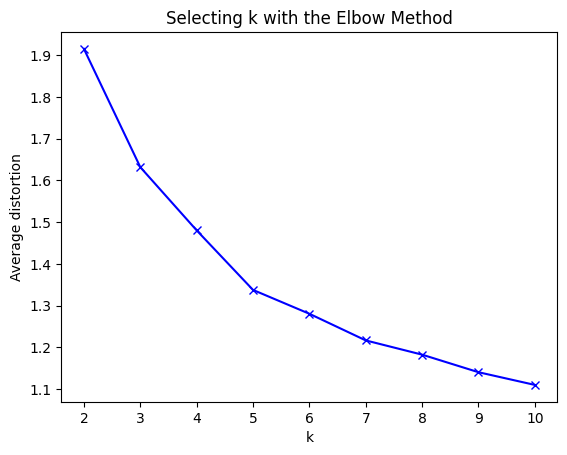

In [23]:
# Apply K-Means clustering for 2 to 10 clusters. 
# Also Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k, n_init=100)
    model.fit(dfScaled)
    y=sum(np.min(cdist(dfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfScaled.shape[0]
    meanDistortions.append(y)
# Plot a visual and find elbow point.
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

#### Elbow point observation
1. Prominent Elbow appears at both 3 and 5
2. Considering the sharpness, 5 seems to be the logical choice

In [24]:
# Train a K-means clustering model once again on the optimal number of clusters.
model=KMeans(n_clusters=5, n_init=100)
model.fit(dfScaled)
# Add a new feature in the DataFrame which will have labels based upon cluster value
prediction=model.predict(dfScaled)
df['Class'] = prediction
dfScaled['Class'] = prediction
dfScaled.head(5)

mpg       cyl      disp        hp        wt       acc    origin  \
0 -0.706439  1.498191  1.090604  0.669196  0.630870 -1.295498 -0.715145   
1 -1.090751  1.498191  1.503514  1.586599  0.854333 -1.477038 -0.715145   
2 -0.706439  1.498191  1.196232  1.193426  0.550470 -1.658577 -0.715145   
3 -0.962647  1.498191  1.061796  1.193426  0.546923 -1.295498 -0.715145   
4 -0.834543  1.498191  1.042591  0.931311  0.565841 -1.840117 -0.715145   

        Age  Class  
0  1.627426      1  
1  1.627426      1  
2  1.627426      1  
3  1.627426      1  
4  1.627426      1

In [25]:
# Added the class in base db also
df.head(5)

car_name   mpg  cyl   disp     hp    wt   acc  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5       1   

   Age  Class  
0   54      1  
1   54      1  
2   54      1  
3   54      1  
4   54      1

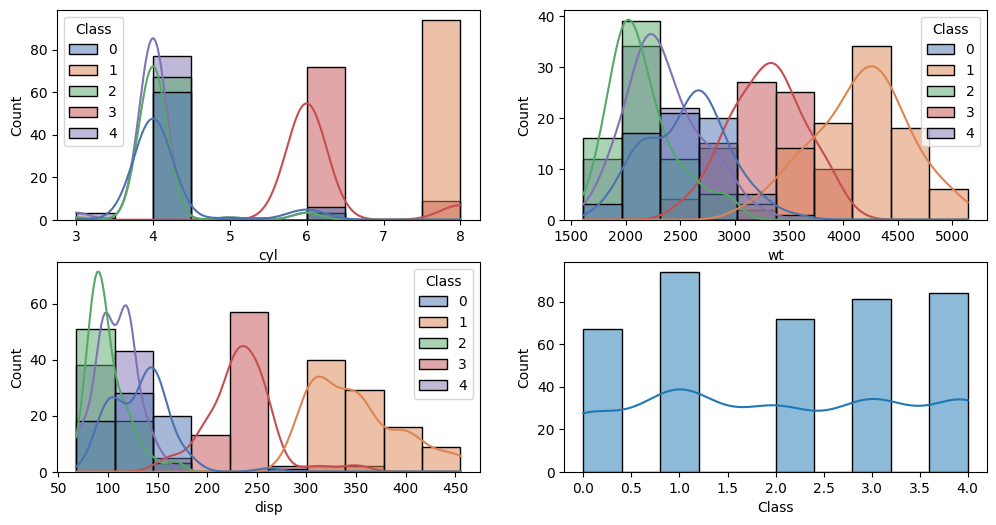

In [26]:
# Plot a visual and color the datapoints based upon clusters.
fig, ( (ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(12,6))
sns.histplot(data=df, x='cyl',  hue='Class', palette='deep', ax=ax1, kde=True)
sns.histplot(data=df, x='wt',  hue='Class', palette='deep', ax=ax2, kde=True)
sns.histplot(data=df, x='disp',  hue='Class', palette='deep', ax=ax3, kde=True)
sns.histplot(data=df, x='Class',  ax=ax4, kde=True)
plt.show()

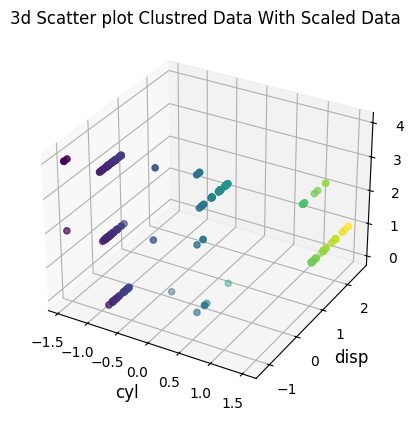

In [27]:
# importing mplot3d toolkits
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection ='3d')
 
# defining axes
z = dfScaled['Class']
x = dfScaled['cyl']
y = dfScaled['disp']
c = x + y
ax.scatter(x, y, z, c = c)
ax.set_xlabel('cyl', fontsize=12)
ax.set_ylabel('disp', fontsize=12)
ax.set_zlabel('Class', fontsize=12)
ax.set_title('3d Scatter plot Clustred Data With Scaled Data')

plt.show()

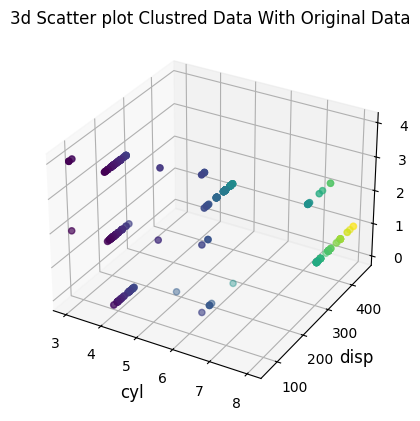

In [28]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
 
# defining axes
z = df['Class']
x = df['cyl']
y = df['disp']
c = x + y
ax.scatter(x, y, z, c = c)
ax.set_xlabel('cyl', fontsize=12)
ax.set_ylabel('disp', fontsize=12)
ax.set_zlabel('Class', fontsize=12)

ax.set_title('3d Scatter plot Clustred Data With Original Data')
plt.show()

In [29]:
# Pass a new DataPoint and predict which cluster it belongs to.
from secrets import randbelow
any_row = randbelow(df.shape[0])
ser=df.iloc[any_row, 1:-1]
# printing the original sample
print('Row number = {}'.format(any_row))
print(ser) 
# modifying data for a new data sample

ser['mpg'] = ser['mpg'] + 2
ser['cyl'] = ser['cyl'] + 1
ser['disp'] = ser['disp'] - 10
ser['hp'] = ser['hp']
ser['wt'] = ser['wt'] + 20
ser['acc'] = ser['acc'] - 1
ser['origin'] = ser['origin'] 
ser['Age'] = ser['Age']
#serAttr = ser.drop(labels=['Class']) 
#serScaled = ser.to_frame().apply(zscore)
ser

Row number = 374
mpg             23.0
cyl                4
disp           151.0
hp        104.469388
wt              3035
acc             20.5
origin             1
Age               42
Name: 374, dtype: object


mpg             25.0
cyl                5
disp           141.0
hp        104.469388
wt              3055
acc             19.5
origin             1
Age               42
Name: 374, dtype: object

In [30]:
ser_df = ser.to_frame().T
ser_df

mpg cyl   disp          hp    wt   acc origin Age
374  25.0   5  141.0  104.469388  3055  19.5      1  42

In [31]:
mu = df['mpg'].mean()
sigma = df['mpg'].std()
ser_df.loc[any_row, 'mpg'] = (ser['mpg'] - mu ) / sigma

mu = df['cyl'].mean()
sigma = df['cyl'].std()
ser_df.loc[any_row, 'cyl'] = (ser['cyl'] - mu ) / sigma

mu = df['disp'].mean()
sigma = df['disp'].std()
ser_df.loc[any_row, 'disp'] = (ser['disp'] - mu ) / sigma

mu = df['hp'].mean()
sigma = df['hp'].std()
ser_df.loc[any_row, 'hp'] = (ser['cyl'] - mu ) / sigma

ser['wt'] = ser['wt'] + 20

mu = df['wt'].mean()
sigma = df['wt'].std()
ser_df.loc[any_row, 'wt'] = (ser['wt'] - mu ) / sigma

mu = df['acc'].mean()
sigma = df['acc'].std()
ser_df.loc[any_row, 'acc'] = (ser['acc'] - mu ) / sigma

mu = df['origin'].mean()
sigma = df['origin'].std()
ser_df.loc[any_row, 'origin'] = (ser['origin'] - mu ) / sigma

mu = df['Age'].mean()
sigma = df['Age'].std()
ser_df.loc[any_row, 'Age'] = (ser['Age'] - mu ) / sigma

ser_df


mpg       cyl     disp        hp        wt       acc    origin  \
374  0.19005 -0.267356 -0.50279 -2.741858  0.123489  1.425799 -0.714246   

          Age  
374 -1.619944

In [32]:
prediction=model.predict(ser_df)
prediction

array([0])

In [33]:
#Conclusion - The new random data point belongs to Class 0 in last run, value might change with another run

In [34]:
# Part 2. 1 a - Read ‘vehicle.csv’ and save as DataFrame.
df_car = pd.read_csv('vehicle.csv')
df_car.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [35]:
# 2.1 b- Check percentage of missing values and impute with correct approach.
df_car.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [36]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [37]:
# Looping the entire data for null check
for i in df_car.index:
    for col in df_car.drop(labels=['class'], axis=1).columns:
        if df_car.isnull().loc[i, col] == True:
            print('{} null/not numeric for index = {} value= {}'.format(col, i, df_car.loc[i, col])) 

circularity null/not numeric for index = 5 value= nan
radius_ratio null/not numeric for index = 9 value= nan
pr.axis_aspect_ratio null/not numeric for index = 19 value= nan
distance_circularity null/not numeric for index = 35 value= nan
scaled_radius_of_gyration.1 null/not numeric for index = 66 value= nan
skewness_about null/not numeric for index = 66 value= nan
pr.axis_rectangularity null/not numeric for index = 70 value= nan
scaled_radius_of_gyration.1 null/not numeric for index = 77 value= nan
radius_ratio null/not numeric for index = 78 value= nan
circularity null/not numeric for index = 105 value= nan
scaled_variance null/not numeric for index = 105 value= nan
skewness_about.1 null/not numeric for index = 105 value= nan
circularity null/not numeric for index = 118 value= nan
distance_circularity null/not numeric for index = 118 value= nan
skewness_about null/not numeric for index = 141 value= nan
radius_ratio null/not numeric for index = 159 value= nan
skewness_about null/not num

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

a = df_car['circularity']
imputer.fit(a.to_frame())
imputed_data = imputer.transform(df_car['circularity'].to_frame())
df_car['circularity'] = imputed_data

a = df_car['distance_circularity']
imputer.fit(a.to_frame())
imputed_data = imputer.transform(df_car['distance_circularity'].to_frame())
df_car['distance_circularity'] = imputed_data

a = df_car['radius_ratio']
imputer.fit(a.to_frame())
imputed_data = imputer.transform(df_car['radius_ratio'].to_frame())
df_car['radius_ratio'] = imputed_data

a = df_car['scatter_ratio']
imputer.fit(a.to_frame())
imputed_data = imputer.transform(df_car['scatter_ratio'].to_frame())
df_car['scatter_ratio'] = imputed_data

a = df_car['elongatedness']
imputer.fit(a.to_frame())
imputed_data = imputer.transform(df_car['elongatedness'].to_frame())
df_car['elongatedness'] = imputed_data

a = df_car['pr.axis_rectangularity']
imputer.fit(a.to_frame())
imputed_data = imputer.transform(df_car['pr.axis_rectangularity'].to_frame())
df_car['pr.axis_rectangularity'] = imputed_data

a = df_car['pr.axis_aspect_ratio']
imputer.fit(a.to_frame())
imputed_data = imputer.transform(df_car['pr.axis_aspect_ratio'].to_frame())
df_car['pr.axis_aspect_ratio'] = imputed_data

a = df_car['scaled_variance']
imputer.fit(a.to_frame())
imputed_data = imputer.transform(df_car['scaled_variance'].to_frame())
df_car['scaled_variance'] = imputed_data

a = df_car['scaled_variance.1']
imputer.fit(a.to_frame())
imputed_data = imputer.transform(df_car['scaled_variance.1'].to_frame())
df_car['scaled_variance.1'] = imputed_data

a = df_car['scaled_radius_of_gyration']
imputer.fit(a.to_frame())
imputed_data = imputer.transform(df_car['scaled_radius_of_gyration'].to_frame())
df_car['scaled_radius_of_gyration'] = imputed_data

a = df_car['scaled_radius_of_gyration.1']
imputer.fit(a.to_frame())
imputed_data = imputer.transform(df_car['scaled_radius_of_gyration.1'].to_frame())
df_car['scaled_radius_of_gyration.1'] = imputed_data

a = df_car['skewness_about']
imputer.fit(a.to_frame())
imputed_data = imputer.transform(df_car['skewness_about'].to_frame())
df_car['skewness_about'] = imputed_data

a = df_car['skewness_about.1']
imputer.fit(a.to_frame())
imputed_data = imputer.transform(df_car['skewness_about.1'].to_frame())
df_car['skewness_about.1'] = imputed_data

a = df_car['skewness_about.2']
imputer.fit(a.to_frame())
imputed_data = imputer.transform(df_car['skewness_about.2'].to_frame())
df_car['skewness_about.2'] = imputed_data

for i in df_car.index:
    for col in df_car.drop(labels=['class'], axis=1).columns:
        if df_car.isnull().loc[i, col] == True or df_car.loc[i, col]==np.nan:
            print('{} null/not numeric for index = {} value= {}'.format(col, i, df_car.loc[i, col]))
            df_car.loc[i, col] = np.nan

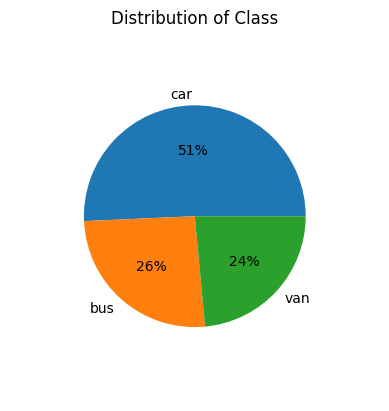

In [39]:
# 2.1 c- Visualize a Pie-chart and print percentage of values for variable ‘class’.
fig, ax = plt.subplots()
ax.set_title('Distribution of Class')
ax.pie(data=df_car, labels=df_car['class'].value_counts().keys(), x=df_car['class'].value_counts(), autopct='%.0f%%', radius=0.75)
plt.show()

In [40]:
# 2.1 d - Check for duplicate rows in the data and impute with correct approach.
# Find duplicate rows
duplicate_rows = df_car.duplicated()

# Print the duplicate rows
d = duplicate_rows.to_frame()
d[ d.loc[:, 0] == True].sum()

0    0
dtype: int64

In [41]:
d[ d.loc[:, 0] == True]

Empty DataFrame
Columns: [0]
Index: []

In [42]:
# 2.2 a - Split data into X and Y.
X = df_car.drop(labels=['class'], axis=1)
Y = df_car['class']
X.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [43]:
Y.head(5)

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(Y)
LabelEncoder()

LabelEncoder()

In [45]:
le.classes_

array(['bus', 'car', 'van'], dtype=object)

In [46]:
Y = le.transform(Y)
print(Y.shape)
Y

(846,)


array([2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 2,
       0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2,
       0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0,
       2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1,
       2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 0,
       1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2,
       1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1,
       0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1,

In [47]:
# Train a base Classification model using SVM.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=11)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(634, 18)
(634,)
(212, 18)
(212,)


In [48]:
# Standardization 
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

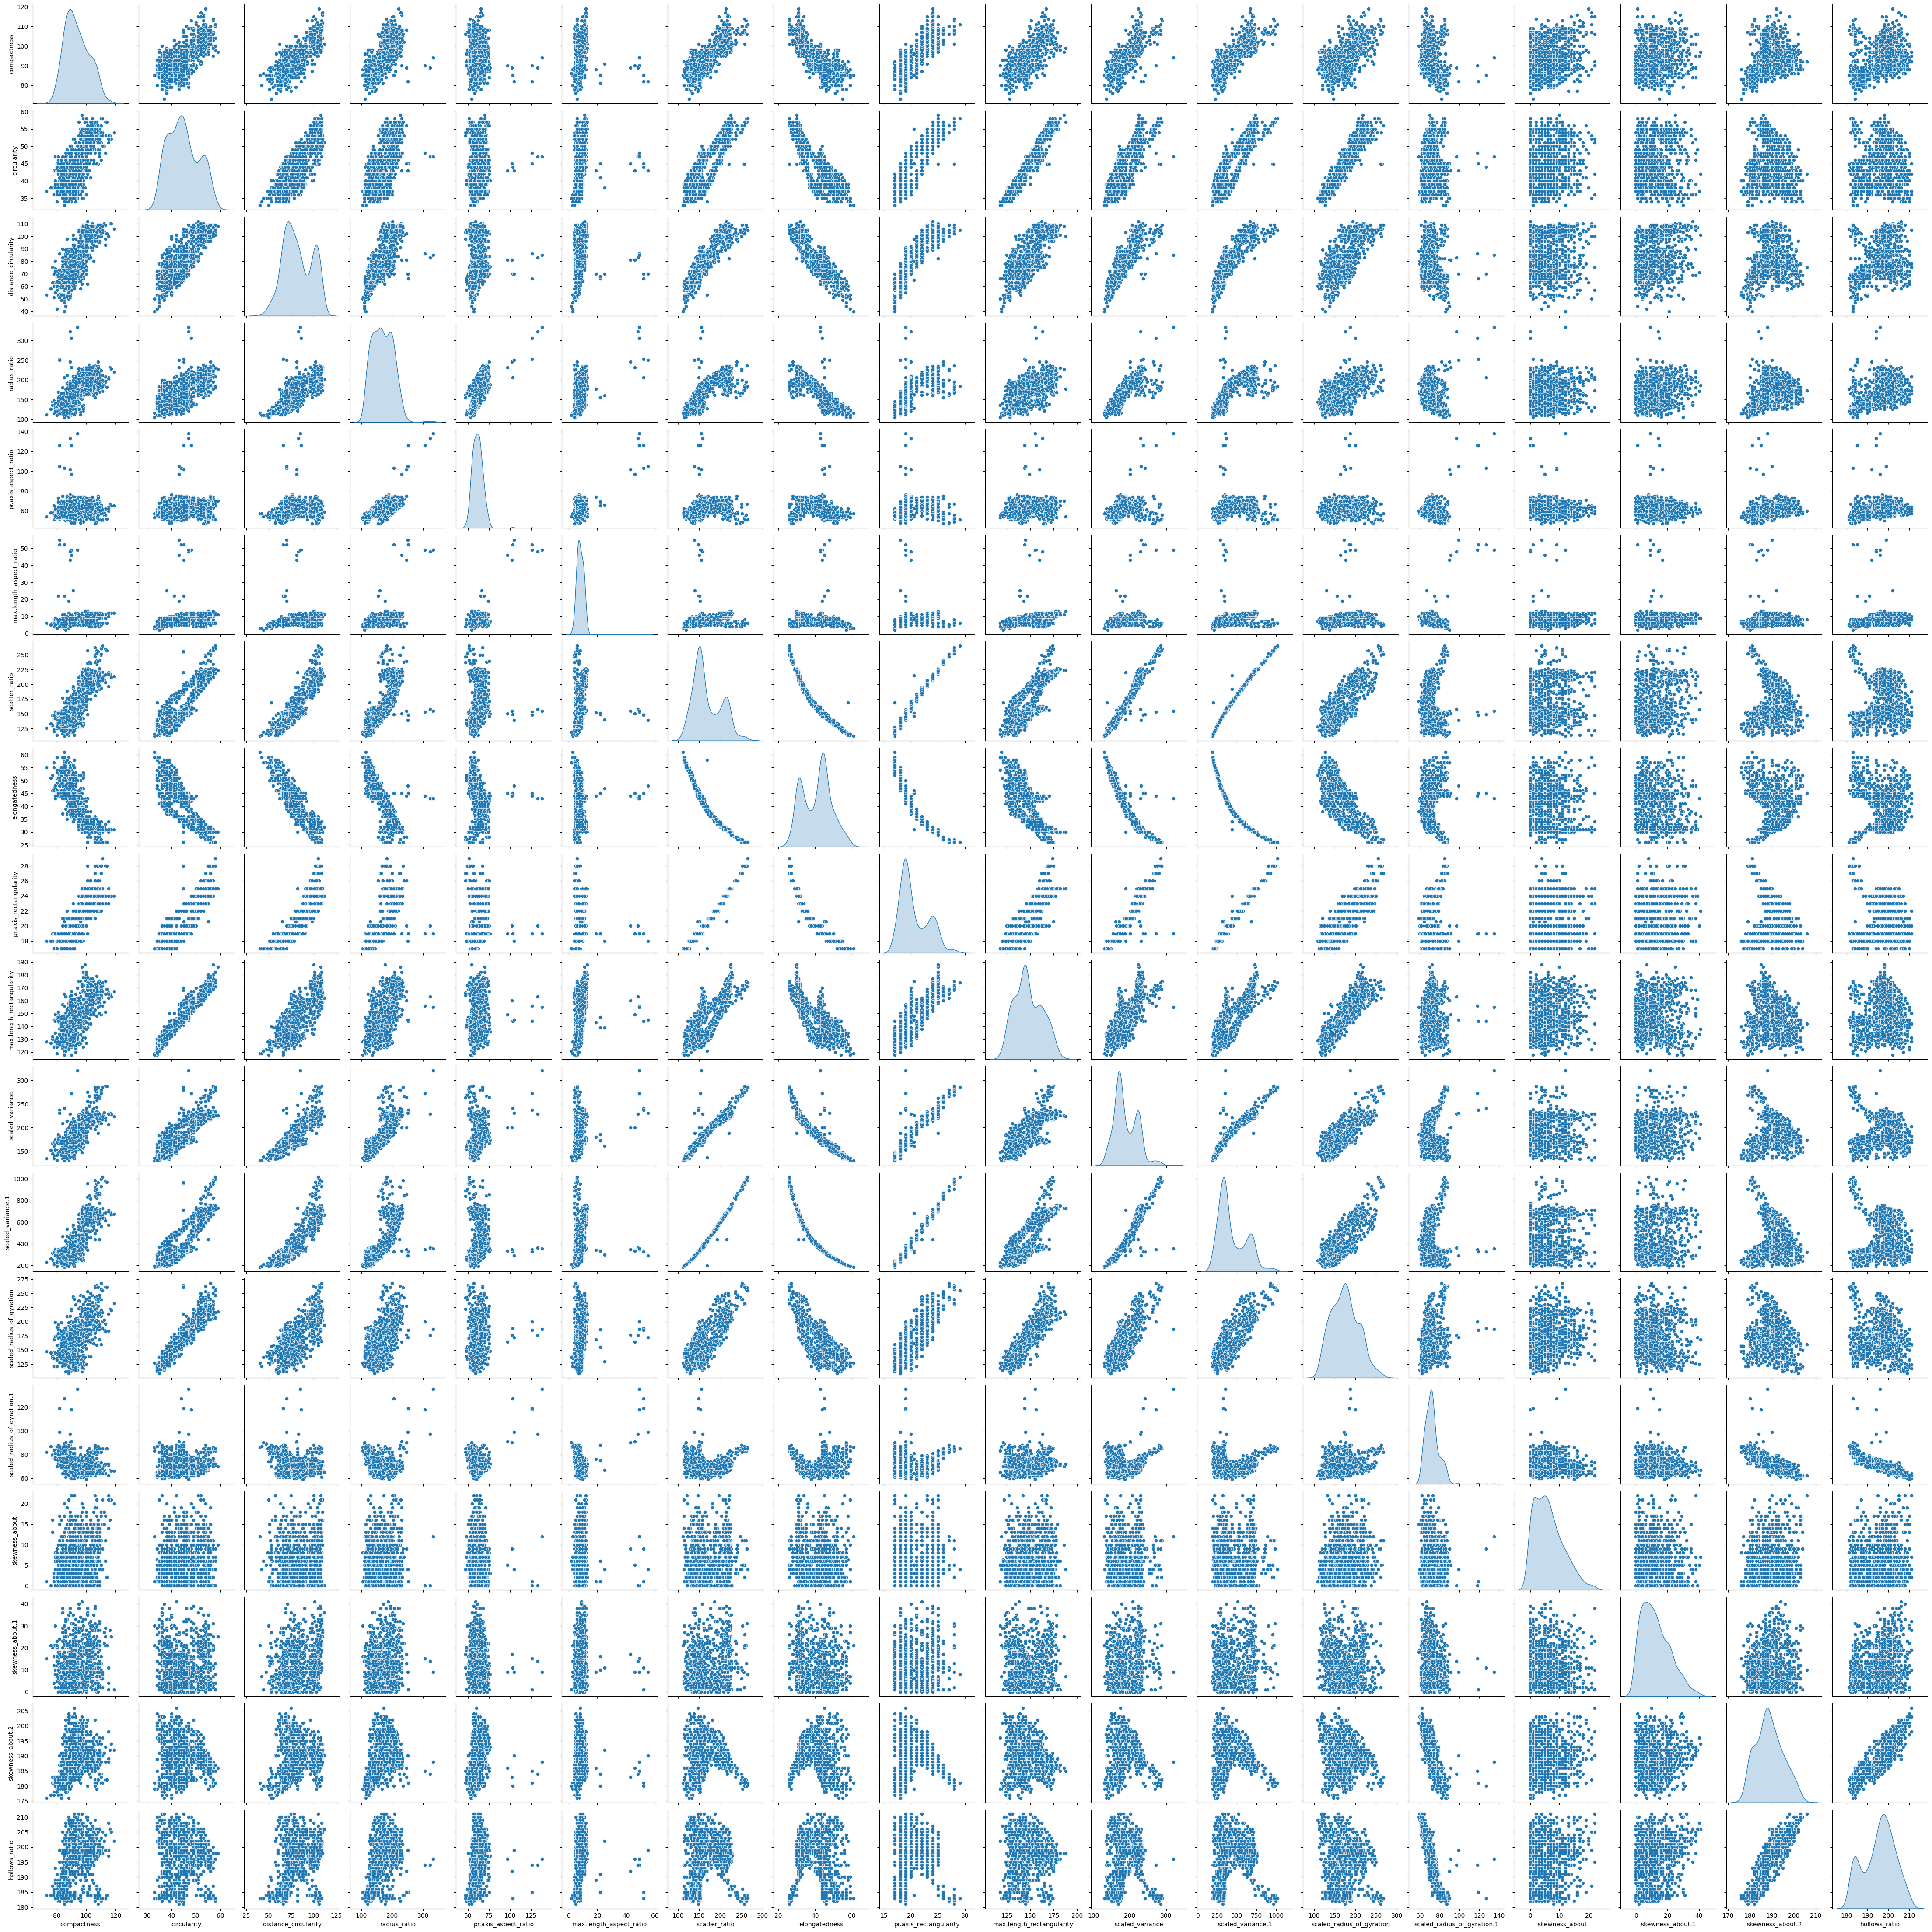

In [49]:
# Now look at the data to see if the features are related to each other especially in linear way
sns.pairplot(data=X, diag_kind='kde')
plt.show()

In [70]:
# Train a base Classification model using SVM.
# Part 2.3 b - Print Classification metrics for train data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
svc = SVC(gamma='auto')
svc.fit(X_train_sd, y_train)
y_pred=svc.predict(X_test_sd)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print('f1 scores (test) = {} '.format(f1))
print ('Before PCA Base SVC score (train)', svc.score(X_train_sd, y_train))
print ('Before PCA Base SVC score (test)', svc.score(X_test_sd, y_test))
c=pd.DataFrame(data=cm, index=['bus', 'car', 'van'], columns=['bus', 'car', 'van'])
c

f1 scores (test) = [0.97297297 0.97652582 0.96      ] 
Before PCA Base SVC score (train) 0.9716088328075709
Before PCA Base SVC score (test) 0.9716981132075472


bus  car  van
bus   54    0    1
car    2  104    1
van    0    2   48

In [51]:
# Not in question but done this to understand the nature of data
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca.fit(X_train_sd)

PCA(n_components=18)

In [52]:
cum = 0.0
ctr = 0
for i in pca.explained_variance_:
    cum = cum + i
    ctr = ctr +1
    print('{} -> {:.2f}  cum = {:.2f} '.format(ctr, i, cum))

1 -> 9.47  cum = 9.47 
2 -> 2.96  cum = 12.43 
3 -> 1.89  cum = 14.32 
4 -> 1.21  cum = 15.53 
5 -> 0.92  cum = 16.45 
6 -> 0.55  cum = 17.00 
7 -> 0.35  cum = 17.36 
8 -> 0.20  cum = 17.56 
9 -> 0.16  cum = 17.72 
10 -> 0.09  cum = 17.81 
11 -> 0.07  cum = 17.88 
12 -> 0.04  cum = 17.92 
13 -> 0.04  cum = 17.96 
14 -> 0.03  cum = 17.98 
15 -> 0.02  cum = 18.00 
16 -> 0.01  cum = 18.02 
17 -> 0.01  cum = 18.03 
18 -> 0.00  cum = 18.03 


In [53]:
cum = 0.0
ctr = 0
for i in pca.explained_variance_ratio_:
    cum = cum + i
    ctr = ctr +1
    print('{} -> {:.2f}  cum = {:.4f} '.format(ctr, i, cum))

1 -> 0.53  cum = 0.5251 
2 -> 0.16  cum = 0.6895 
3 -> 0.10  cum = 0.7944 
4 -> 0.07  cum = 0.8616 
5 -> 0.05  cum = 0.9127 
6 -> 0.03  cum = 0.9432 
7 -> 0.02  cum = 0.9627 
8 -> 0.01  cum = 0.9740 
9 -> 0.01  cum = 0.9828 
10 -> 0.01  cum = 0.9879 
11 -> 0.00  cum = 0.9916 
12 -> 0.00  cum = 0.9941 
13 -> 0.00  cum = 0.9960 
14 -> 0.00  cum = 0.9975 
15 -> 0.00  cum = 0.9986 
16 -> 0.00  cum = 0.9994 
17 -> 0.00  cum = 0.9998 
18 -> 0.00  cum = 1.0000 


In [54]:
# Apply PCA on the data with 10 components.
pca10 = PCA(n_components=10)
pca10.fit(X_train_sd)

PCA(n_components=10)

In [55]:
cum = 0.0
ctr = 0
for i in pca10.explained_variance_:
    cum = cum + i
    ctr = ctr +1
    print('{} -> {:.2f}  cum = {:.2f} '.format(ctr, i, cum))

1 -> 9.47  cum = 9.47 
2 -> 2.96  cum = 12.43 
3 -> 1.89  cum = 14.32 
4 -> 1.21  cum = 15.53 
5 -> 0.92  cum = 16.45 
6 -> 0.55  cum = 17.00 
7 -> 0.35  cum = 17.36 
8 -> 0.20  cum = 17.56 
9 -> 0.16  cum = 17.72 
10 -> 0.09  cum = 17.81 


In [56]:
cum = 0.0
ctr = 0
for i in pca10.explained_variance_ratio_:
    cum = cum + i
    ctr = ctr +1
    print('{} -> {:.2f}  cum = {:.4f} '.format(ctr, i, cum))

1 -> 0.53  cum = 0.5251 
2 -> 0.16  cum = 0.6895 
3 -> 0.10  cum = 0.7944 
4 -> 0.07  cum = 0.8616 
5 -> 0.05  cum = 0.9127 
6 -> 0.03  cum = 0.9432 
7 -> 0.02  cum = 0.9627 
8 -> 0.01  cum = 0.9740 
9 -> 0.01  cum = 0.9828 
10 -> 0.01  cum = 0.9879 


In [57]:
Xpca10 = pca10.transform(X_train_sd)
# Visualize Cumulative Variance Explained with Number of Components. 
Xpca10

array([[-5.31328762,  2.73495757, -0.37718153, ..., -0.39376544,
         0.06506028,  0.16406609],
       [ 3.63281009,  0.56026921, -1.37983108, ..., -0.02993658,
         0.2919003 , -0.49450546],
       [ 3.44413137, -1.76980139, -0.17962317, ..., -0.12644577,
        -0.28505974,  0.21197709],
       ...,
       [-0.25930462,  1.57203009, -0.46390077, ...,  0.30037472,
        -0.4067327 ,  0.0086093 ],
       [-2.56135253,  3.09292891, -0.58656673, ...,  0.17907589,
         0.34794598,  0.15845822],
       [-2.72875111,  3.30529706, -0.47789449, ...,  0.34300335,
         0.27248888,  0.04566321]])

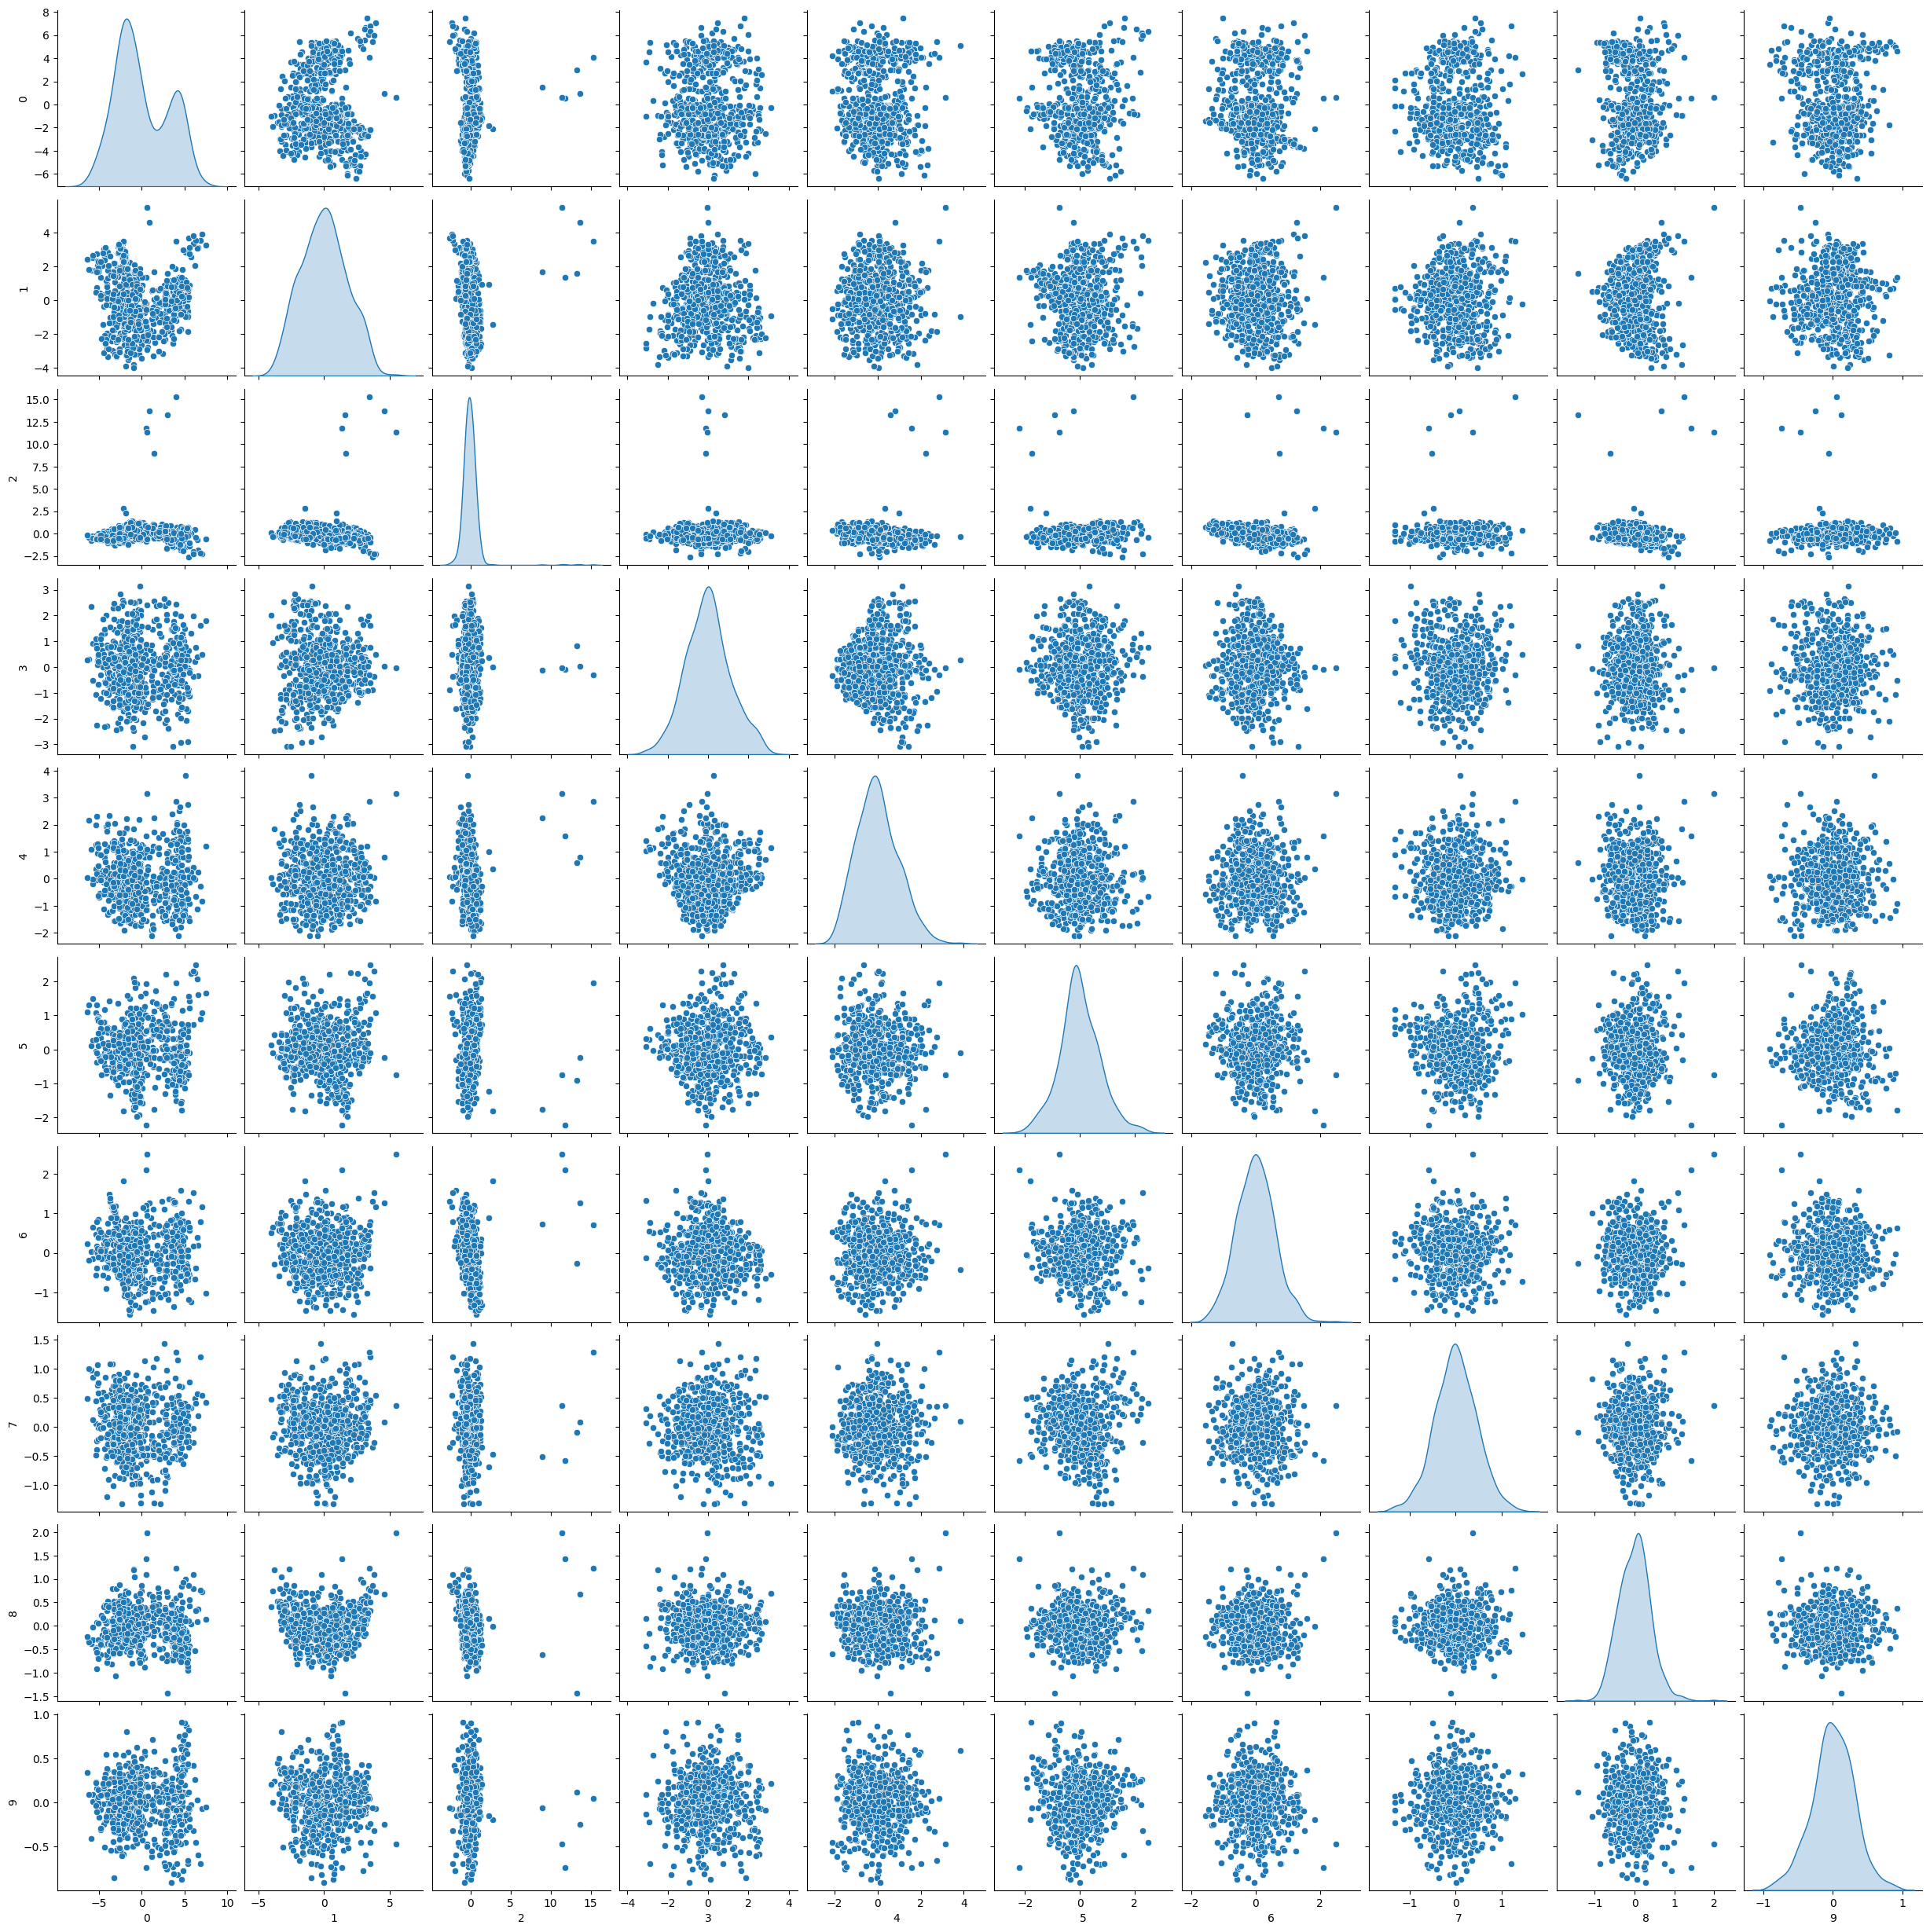

In [58]:
sns.pairplot(pd.DataFrame(Xpca10), diag_kind='kde')
plt.show()

In [71]:
Xpca10_test = pca10.transform(X_test_sd)
svc=SVC(gamma='auto')
svc.fit(Xpca10, y_train)
y_pred=svc.predict(Xpca10_test)

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print('With 10 Features\n*************************')
print('f1 scores (test) = {} '.format(f1))
print ('After PCA with 10 score (train) ', svc.score(Xpca10, y_train))
print ('After PCA with 10 score (test) ', svc.score(Xpca10_test, y_test))
c=pd.DataFrame(data=cm, index=['bus', 'car', 'van'], columns=['bus', 'car', 'van'])
c

With 10 Features
*************************
f1 scores (test) = [0.97297297 0.97169811 0.95049505] 
After PCA with 10 score (train)  0.9779179810725552
After PCA with 10 score (test)  0.9669811320754716


bus  car  van
bus   54    0    1
car    2  103    2
van    0    2   48

In [60]:
# Visualize Cumulative Variance Explained with Number of Components.
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(Xpca10.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 9.46623714e+00 -4.04100134e-16  6.84725227e-16 -1.79600060e-16
  -2.35725078e-16 -5.20559548e-16 -7.01562733e-17  1.12250037e-15
  -7.74525257e-16  5.55637684e-16]
 [-4.04100134e-16  2.96417932e+00  7.33834618e-16 -6.62275220e-16
   2.96059473e-16  4.86884537e-16  9.54125317e-16 -2.38531329e-17
   2.80625093e-17  5.21962673e-16]
 [ 6.84725227e-16  7.33834618e-16  1.89152125e+00  7.88556512e-16
  -4.49000149e-16 -5.21962673e-16 -2.67996964e-16  1.45925048e-16
   1.01025034e-16 -6.31406460e-17]
 [-1.79600060e-16 -6.62275220e-16  7.88556512e-16  1.21183497e+00
   2.91850097e-16 -1.31893794e-16  1.68375056e-17  2.06259443e-16
   4.91093913e-17 -8.41875279e-17]
 [-2.35725078e-16  2.96059473e-16 -4.49000149e-16  2.91850097e-16
   9.20281297e-01 -4.77588830e-16  1.48731299e-16  2.10468820e-16
  -5.33187677e-17  2.55368835e-16]
 [-5.20559548e-16  4.86884537e-16 -5.21962673e-16 -1.31893794e-16
  -4.77588830e-16  5.50098896e-01  3.71828248e-17  2.17484447e-17
   6.489455

In [61]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.15129062  69.79464683  80.41521275  87.21945732  92.38667825
  95.47538878  97.45098015  98.59921686  99.48352677 100.        ]


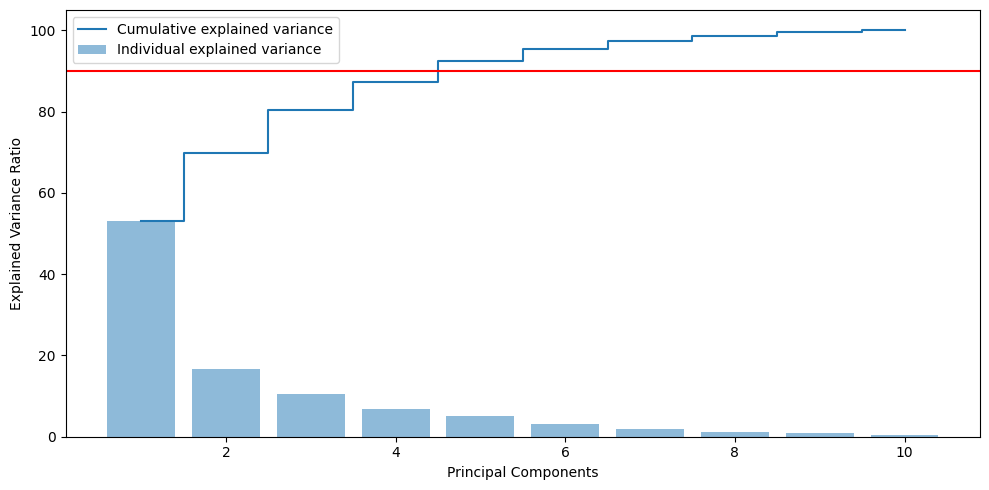

In [62]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
# Draw a horizontal line on the above plot to highlight the threshold of 90%.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.axhline(y = 90, color = 'r', linestyle = '-') 
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [63]:
# Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.
# Part 2.3 g - Train SVM model on components selected from above step.
pca4 = PCA(n_components=4)
pca4.fit(X_train_sd)
Xpca4 = pca4.transform(X_train_sd)
Xpca4_test = pca4.transform(X_test_sd)

In [72]:
svc = SVC(gamma='auto')
svc.fit(Xpca4, y_train)
y_pred=svc.predict(Xpca4_test)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print('With 4 Features\n*************************')
print('f1 scores (test) = {} '.format(f1))
print ('After Applying PCA = 4 score (train) ', svc.score(Xpca4, y_train))
print ('After PCA score (test) ', svc.score(Xpca4_test, y_test))
c=pd.DataFrame(data=cm, index=['bus', 'car', 'van'], columns=['bus', 'car', 'van'])
c

With 4 Features
*************************
f1 scores (test) = [0.72       0.78378378 0.56862745] 
After Applying PCA = 4 score (train)  0.861198738170347
After PCA score (test)  0.7169811320754716


bus  car  van
bus   36   11    8
car    5   87   15
van    4   17   29

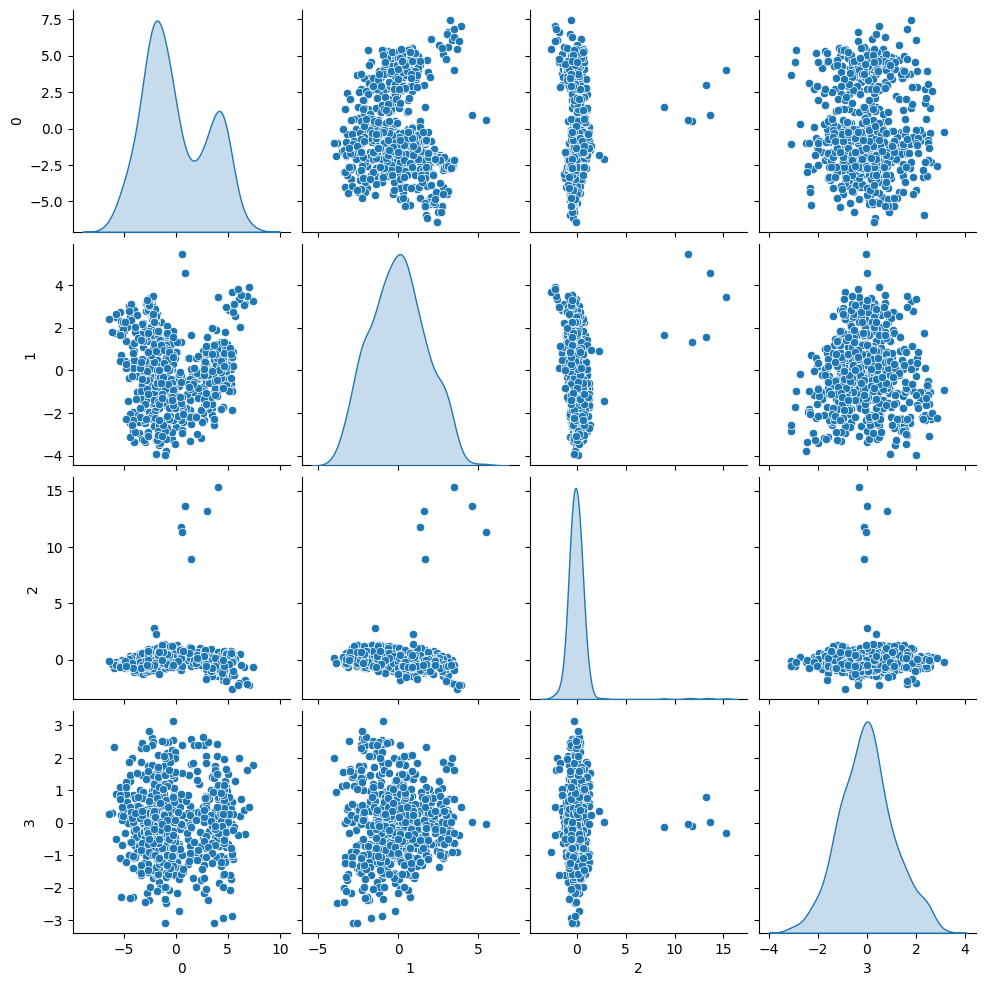

In [65]:
sns.pairplot(pd.DataFrame(Xpca4), diag_kind='kde')
plt.show()

In [66]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
# fitting the model for grid search 
grid.fit(Xpca4, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.669 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.685 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.693 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.654 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.659 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.598 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.591 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.622 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.591 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.669 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [73]:
y_pred=grid.predict(Xpca4_test)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print('With 4 Features Optimal After Tuning\n*************************')
print('f1 scores (test) = {} '.format(f1))
print ('After Applying HyperParameter tuning score (train) = ', grid.score(Xpca4, y_train))
print ('After Applying HyperParameter tuning score (test) ', grid.score(Xpca4_test, y_test))
c=pd.DataFrame(data=cm, index=['bus', 'car', 'van'], columns=['bus', 'car', 'van'])
c

With 4 Features Optimal After Tuning
*************************
f1 scores (test) = [0.79279279 0.80184332 0.58333333] 
After Applying HyperParameter tuning score (train) =  0.8738170347003155
After Applying HyperParameter tuning score (test)  0.75


bus  car  van
bus   44    7    4
car    6   87   14
van    6   16   28

In [68]:
# Share best Parameters observed from above step.
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [69]:
#sns.pairplot(df, diag_kind='kde')
#plt.show()